# Exploratory Data Analysis on Terrorism

### Importing required libraries

In [19]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Importing the dataset

In [20]:
df= pd.read_csv(r'C:\Users\98686\Downloads\Sparks Foundation Internship\globalterrorismdb_0718dist.csv',encoding='latin1')
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [21]:
df.shape

(181691, 135)

In [22]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Data Cleaning

In [25]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region',
                       'attacktype1_txt':'Attack Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True )

In [27]:
df['Casualities']= df.Killed + df.Wounded

Selecting only important columns

In [30]:
df2=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','Attack Type',
        'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]

df2.head(2)
#df2 will be our final datset to be used for analysis

,Year,Month,Day,Country,state,Region,city,latitude,longitude,Attack Type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0


### Missing values

In [31]:
# Check which colums have null values
df2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
Attack Type         0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [33]:
# Alternatively, printing names of columns with null values
[features for features in df2.columns if df2[features].isnull().sum()>0]

['state',
 'city',
 'latitude',
 'longitude',
 'Killed',
 'Wounded',
 'Target',
 'Summary',
 'Motive',
 'Casualities']

In [34]:
# Replacing null values of numerical columns with 0
df2['Wounded']=df2['Wounded'].fillna(0)
df2['nkill']=df['Killed'].fillna(0)
df2['Casualities']=df2['Casualities'].fillna(0)

In [47]:
# Assuming, Killed and wounded null value means no. of people killed/wounded is 0
# We therefore repalce null values in both columns with 0
df2['Killed']=df2['Killed'].fillna(0)
df2['Wounded']=df2['Wounded'].fillna(0)

State and City columns are important, we can replace null values with most frequent value(or name)

In [42]:
df2.state.value_counts()

state
Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: count, Length: 2855, dtype: int64

In [43]:
df2.city.value_counts()

city
Unknown                     9775
Baghdad                     7589
Karachi                     2652
Lima                        2359
Mosul                       2265
                            ... 
Sukirin                        1
Dehiattakandiya district       1
Oued-Djemaa                    1
Qasim                          1
Kubentog                       1
Name: count, Length: 36673, dtype: int64

In [45]:
# Replacing 'Unknown' values with mode in city & state features
df2['state']=df2['state'].fillna('Baghdad')
df2['city']=df2['city'].fillna('Baghdad')

In [48]:
# Checking if any other important column also needs null values to be removed
df2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state               0
Region              0
city                0
latitude         4556
longitude        4557
Attack Type         0
Killed              0
Wounded             0
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities         0
nkill               0
dtype: int64

## Exploratory Data Analysis

#### Terror Attacks with respect to Years

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181691 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attack Type  181691 non-null  object 
 10  Killed       181691 non-null  float64
 11  Wounded      181691 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
 18  Casualities  181691 non-

In [59]:
df2['Year'].value_counts().sort_index

<bound method Series.sort_index of Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: count, dtype: int64>

Number of Attacks each year

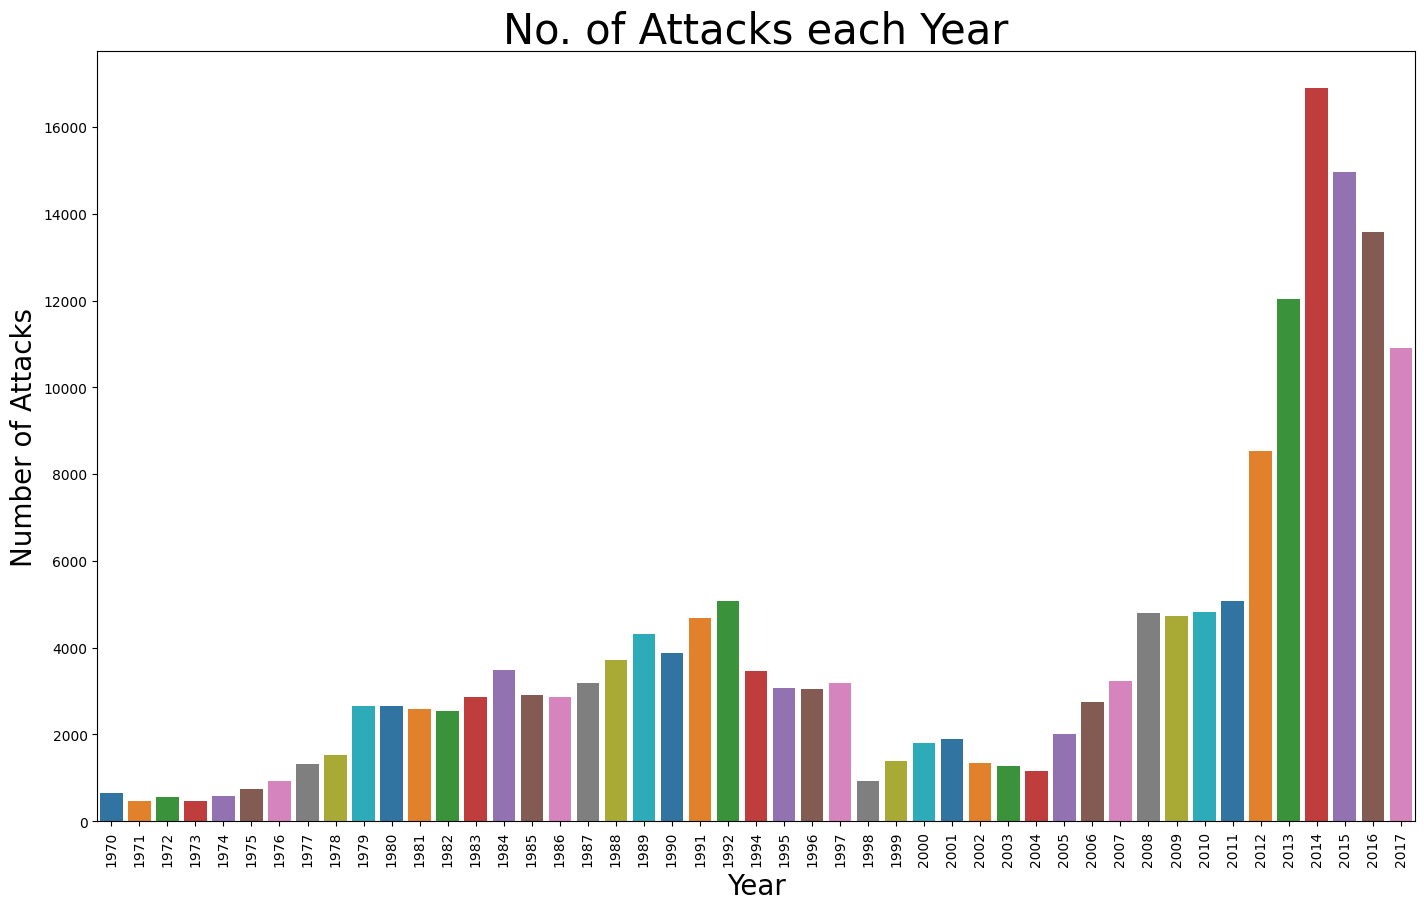

In [63]:
year = df2['Year'].unique()
plt.figure(figsize=(17,10))
sns.countplot(data=df2, x='Year', palette='tab10')
plt.xticks(rotation=90)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.title('No. of Attacks each Year', fontsize=30)
plt.show()

Number of people wounded each year

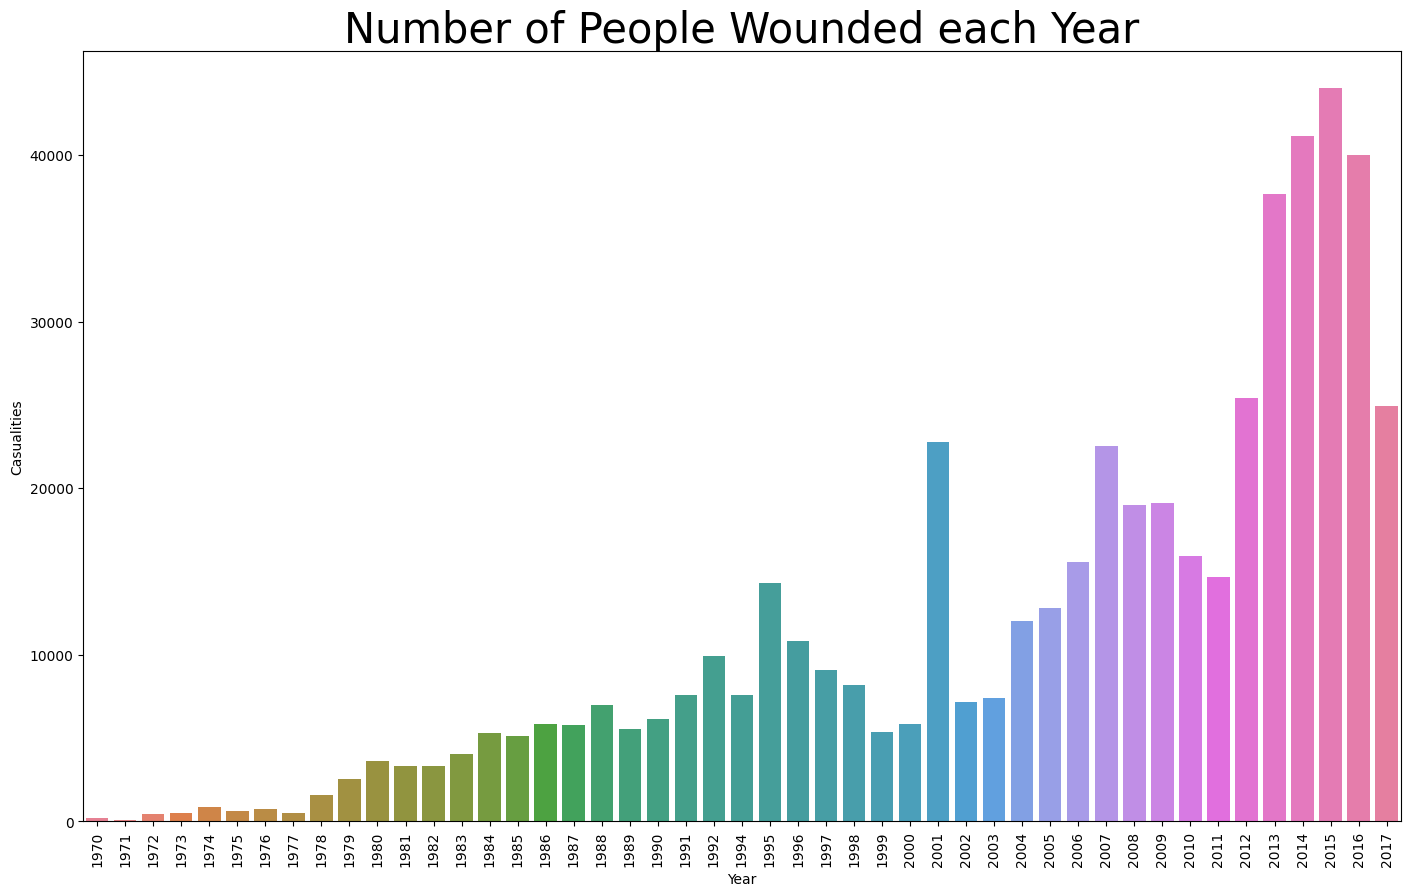

In [70]:
plt.subplots(figsize=(17,10))
year_cas= df2.groupby('Year').Wounded.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='husl')
plt.xticks(rotation=90)
plt.title("Number of People Wounded each Year", fontsize=30)
plt.show()

Number of Casualties each year

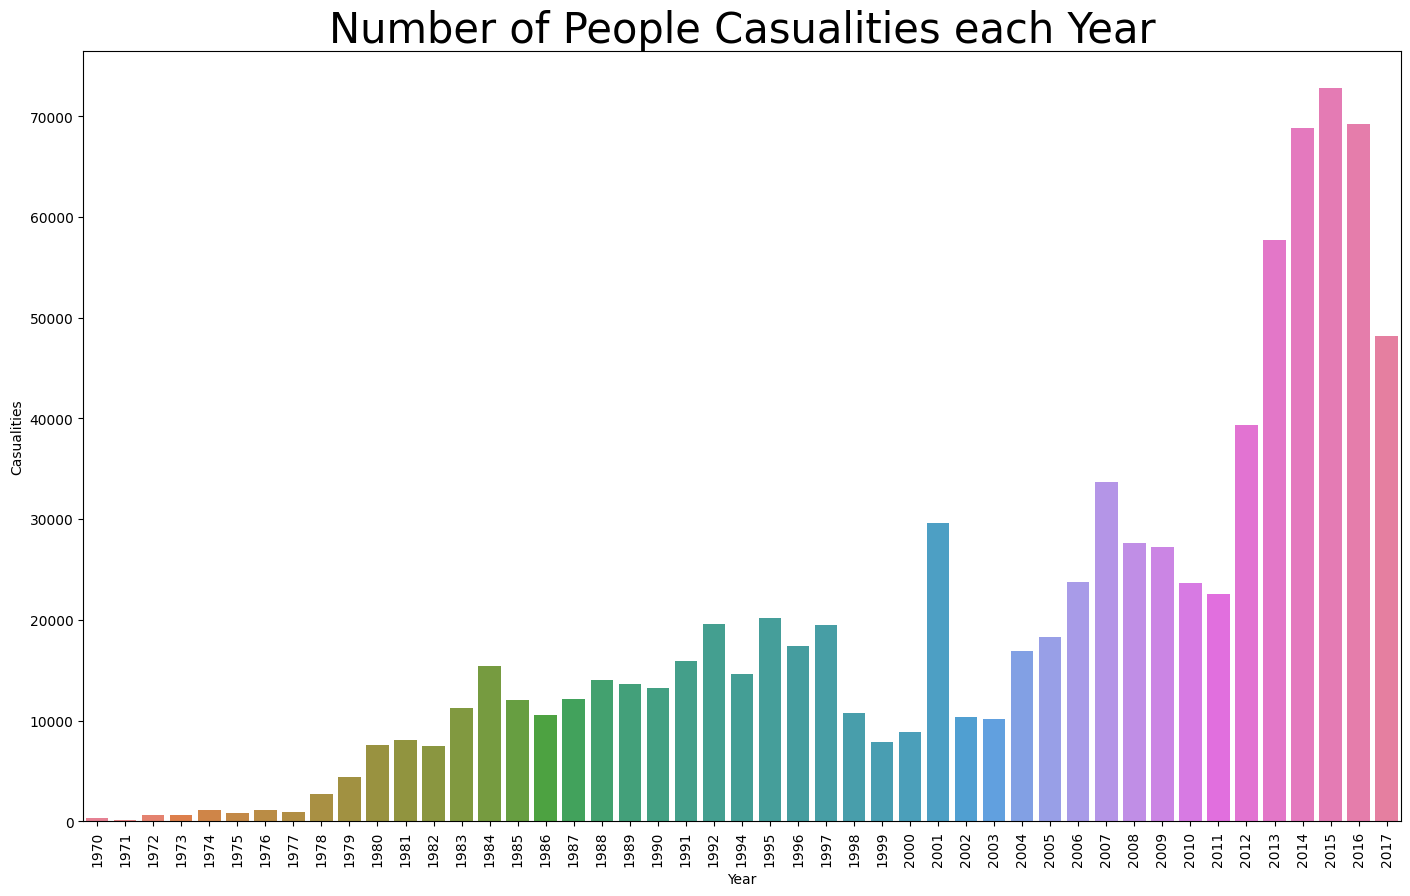

In [73]:
plt.subplots(figsize=(17,10))
year_cas= df2.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='husl')
plt.xticks(rotation=90)
plt.title("Number of People Casualities each Year", fontsize=30)
plt.show()

Number of attacks in each country

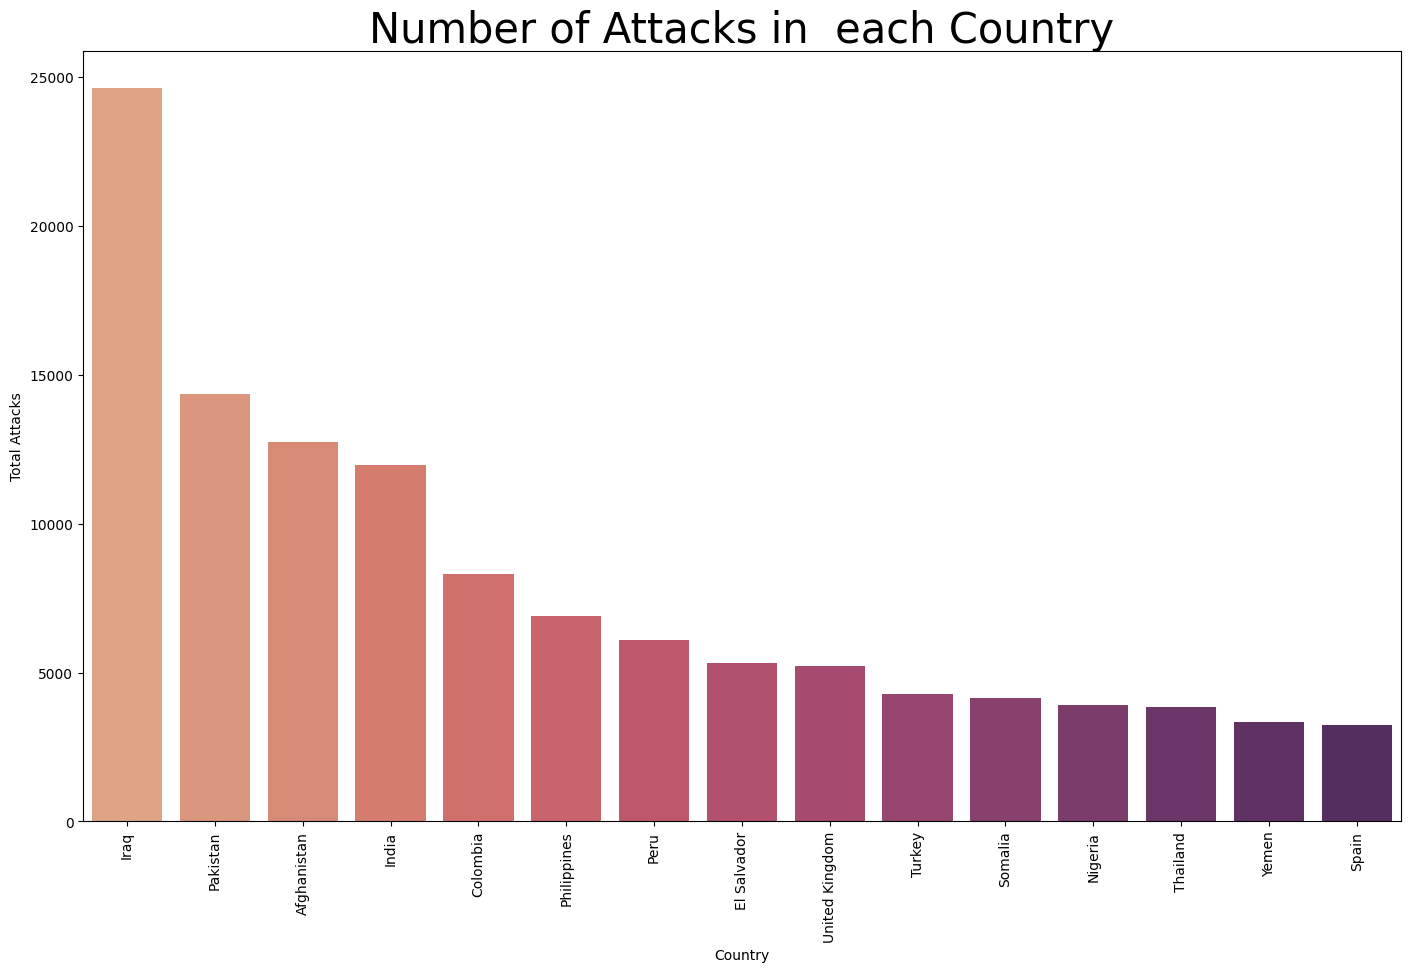

In [76]:
plt.subplots(figsize=(17,10))
country_attacked= df2.Country.value_counts()[:15].reset_index()
country_attacked.columns = ['Country','Total Attacks']
sns.barplot(x=country_attacked.Country, y=country_attacked['Total Attacks'], palette='flare')
plt.xticks(rotation=90)
plt.title("Number of Attacks in  each Country", fontsize=30)
plt.show()

Terrorist Attacks by region and years

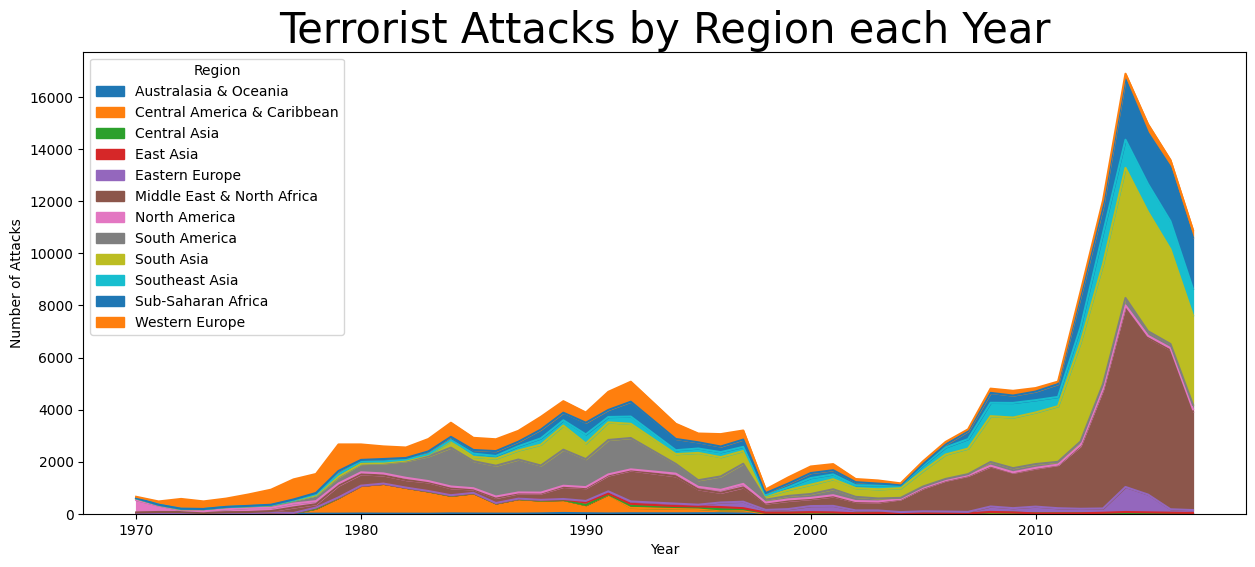

In [77]:
pd.crosstab(df2.Year, df2.Region).plot(kind='area',figsize=(15,6))
plt.title("Terrorist Attacks by Region each Year", fontsize=30)
plt.ylabel("Number of Attacks")
plt.show()

Number of Attacks in each region

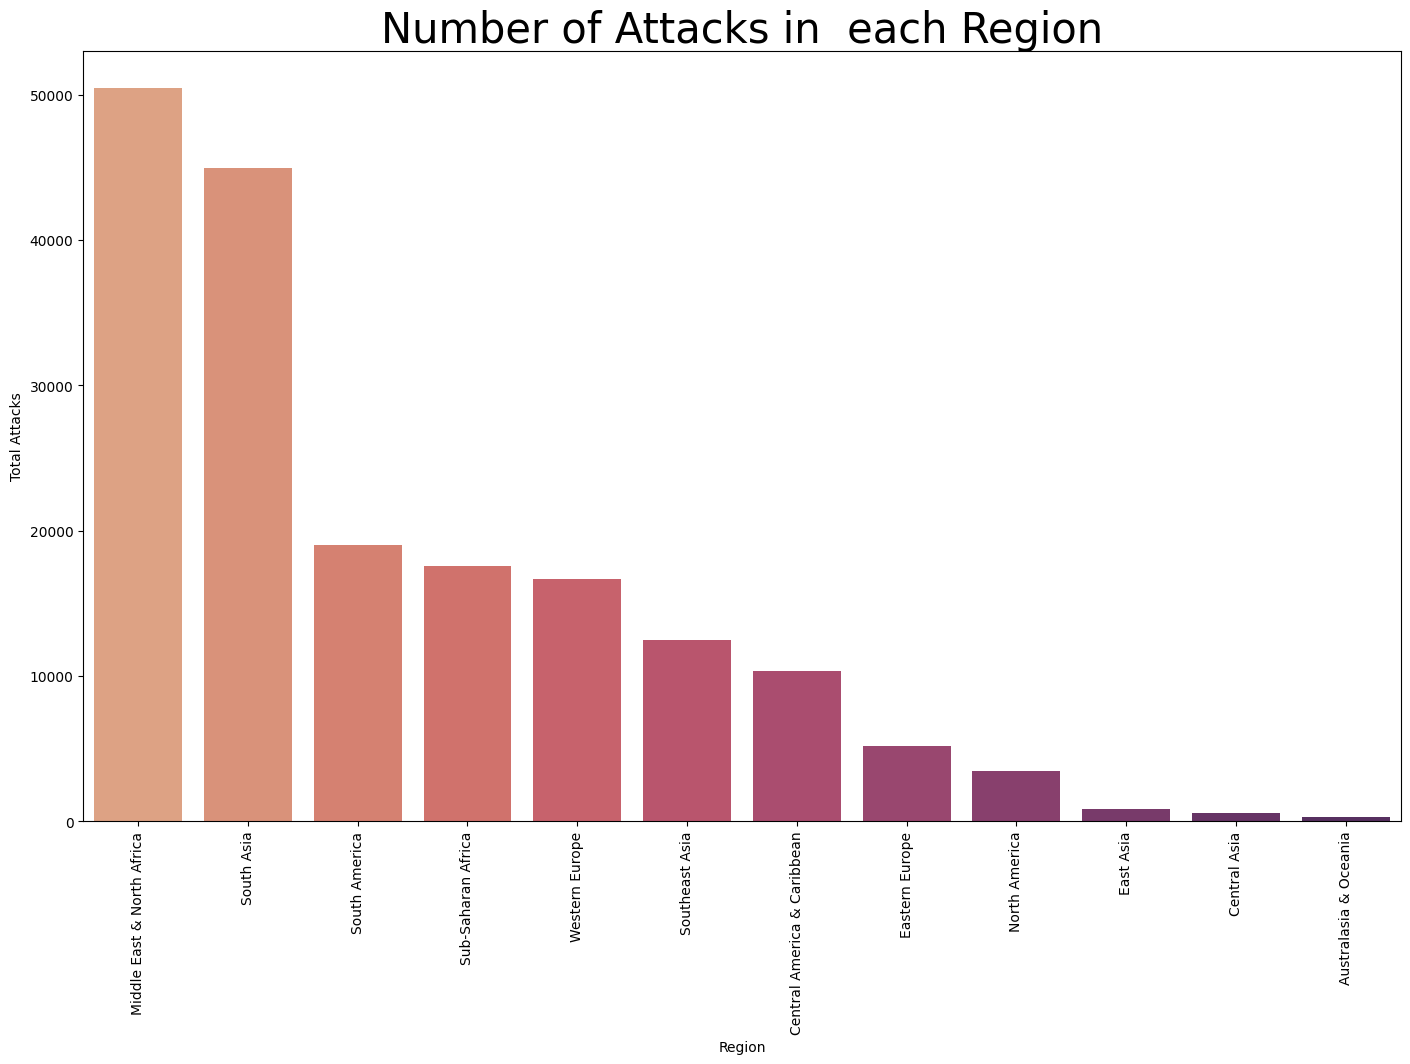

In [79]:
plt.subplots(figsize=(17,10))
region_attacked= df2.Region.value_counts()[:15].reset_index()
region_attacked.columns = ['Region','Total Attacks']
sns.barplot(x=region_attacked.Region, y=region_attacked['Total Attacks'], palette='flare')
plt.xticks(rotation=90)
plt.title("Number of Attacks in  each Region", fontsize=30)
plt.show()

Number of attacks wrt attack type

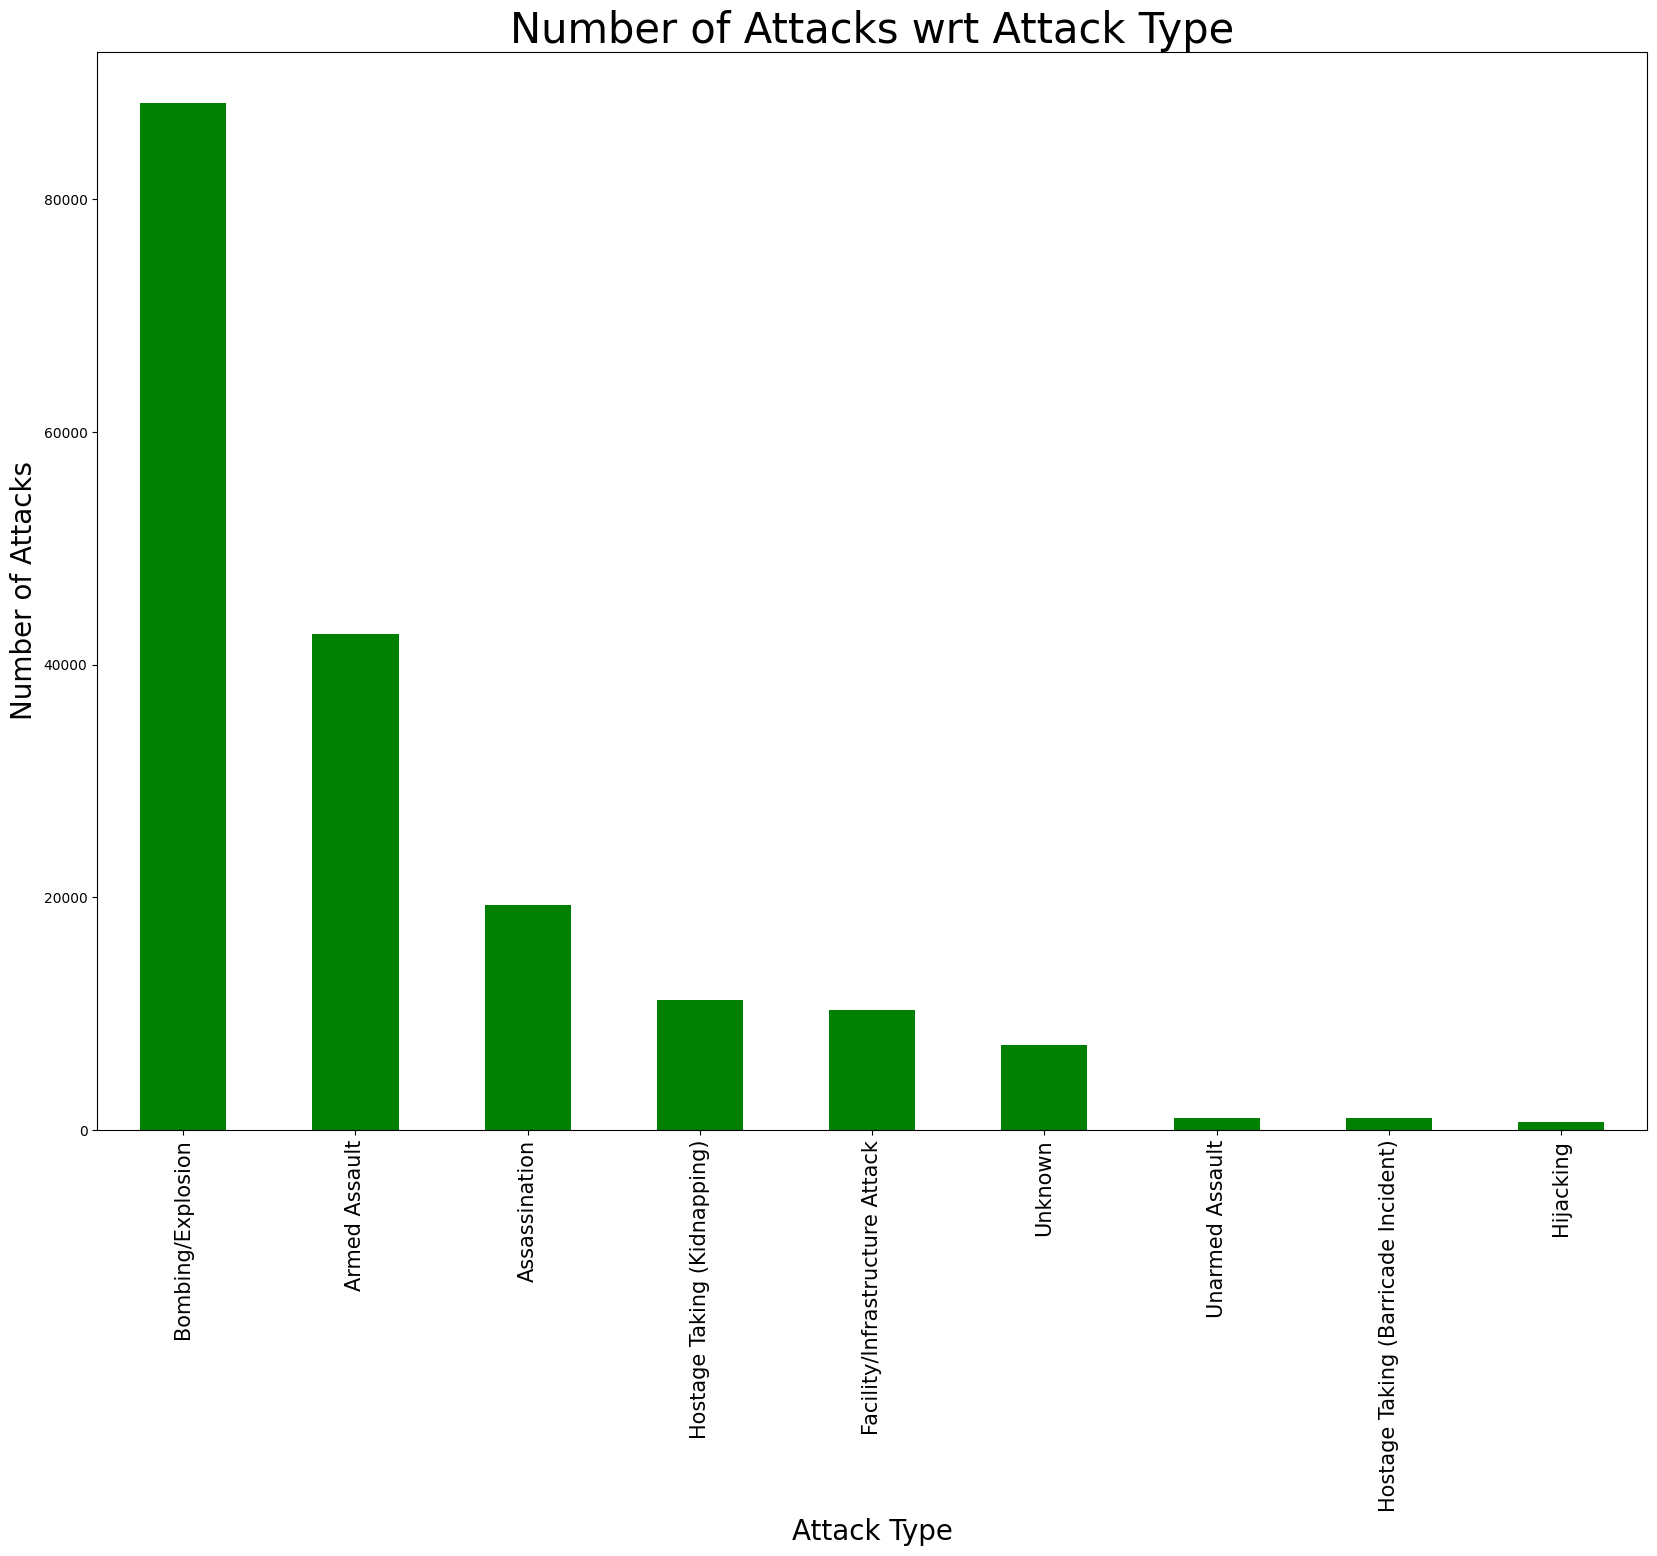

In [90]:
df2['Attack Type'].value_counts().plot(kind='bar', figsize=(20,14), color='green')
plt.xticks(rotation=90, fontsize=15)
plt.title("Number of Attacks wrt Attack Type", fontsize=30)
plt.xlabel("Attack Type", fontsize=20)
plt.ylabel("Number of Attacks", fontsize=20)
plt.show()

Number of total attacks and casualities by city

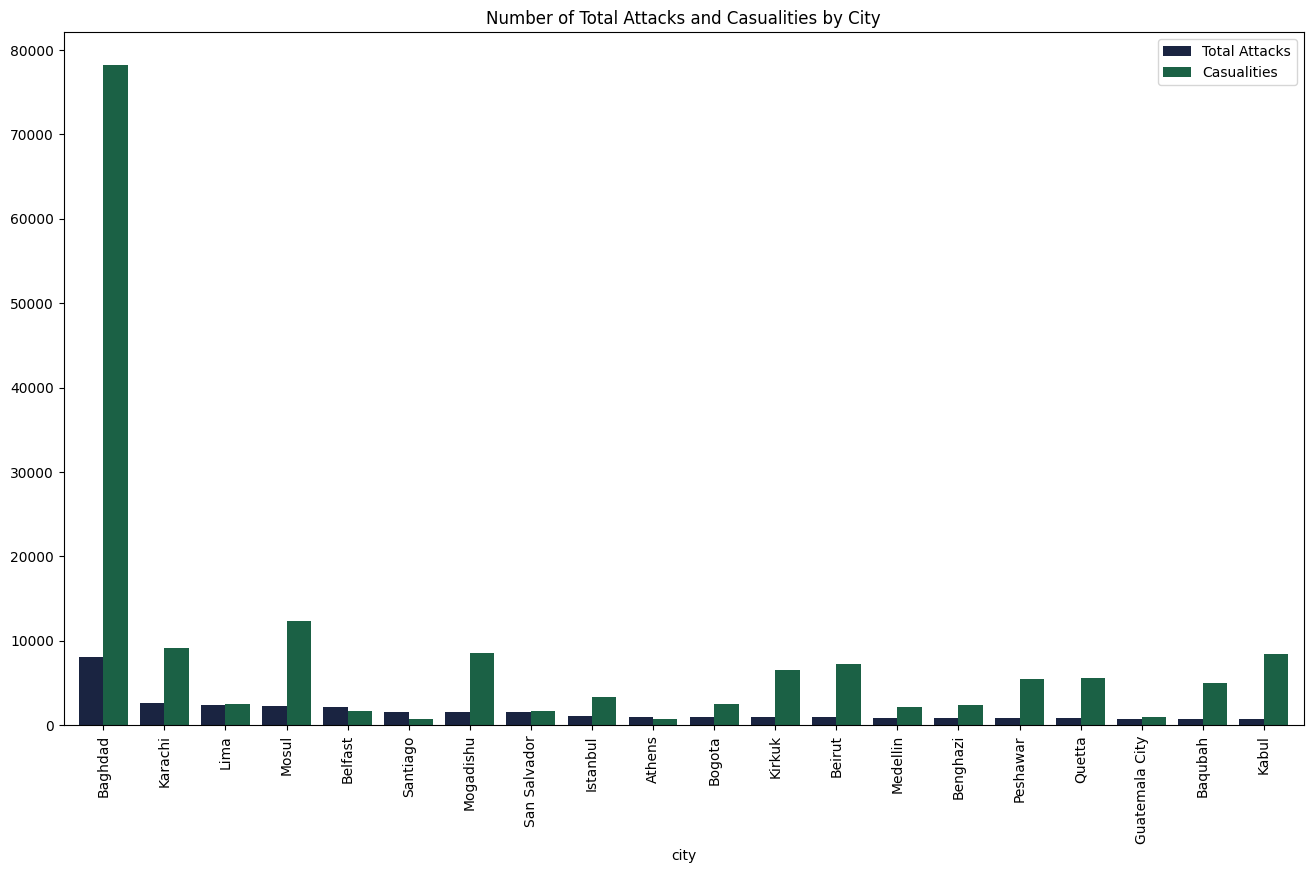

In [96]:
city_attacks = df2.city.value_counts().to_frame().reset_index()
city_attacks.columns = ['city','Total Attacks']
city_cas = df2.groupby('city').Casualities.sum().to_frame().reset_index()
city_cas.columns=['city','Casualities']
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21]
sns.set_palette('cubehelix')
city_tot.plot.bar(x='city',width=0.8)
plt.xticks(rotation=90)
plt.title("Number of Total Attacks and Casualities by City")
fig= plt.gcf()
fig.set_size_inches(16,9)
plt.show()                       

Terrorist groups with most attacks

In [97]:
tg_attacks=df2.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
tg_attacks.columns = ['Terrorist Group','Total Attacks']
tg_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


Number of Attacks by terrorist groups

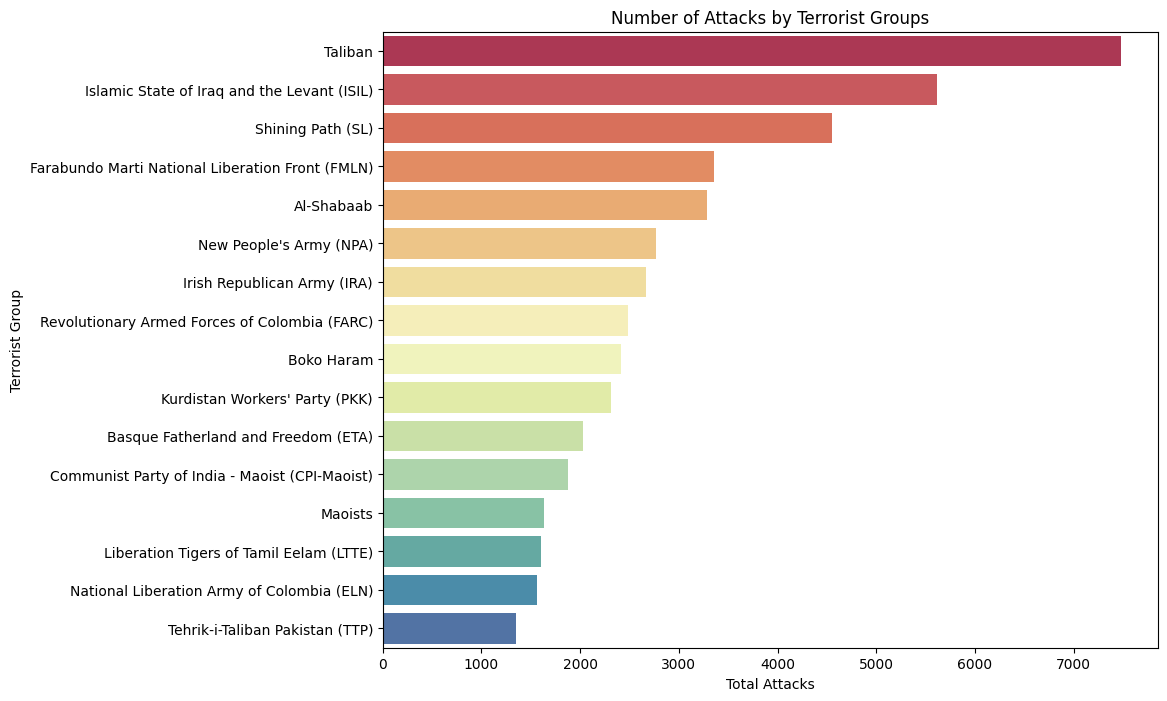

In [98]:
g_attacks=df2.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
g_attacks.columns = ['Terrorist Group','Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=g_attacks['Terrorist Group'], x=g_attacks['Total Attacks'], palette='Spectral')
plt.title('Number of Attacks by Terrorist Groups')
plt.show()

Top Terrorist Group Attacks

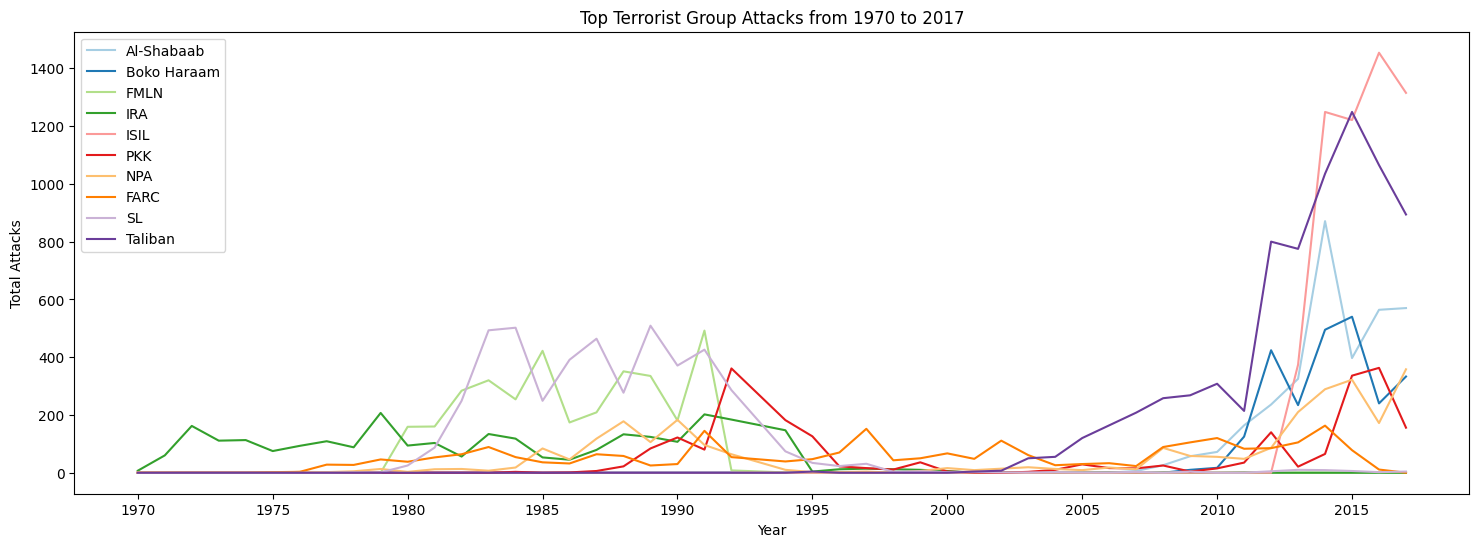

In [102]:
groups_10=df2[df2.Group.isin(df2.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970,2017,5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Group Attacks from 1970 to 2017')
plt.legend(labels=['Al-Shabaab','Boko Haraam','FMLN','IRA','ISIL','PKK','NPA','FARC','SL','Taliban'],loc='upper left')
plt.show()

Total Killings in Terror Attack

In [104]:
killData = df2.loc[:,'Killed']
print('Number of people killed by terror attack:',int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


Country Data

In [106]:
countryData= df2.loc[:,'Country']
countryKillData= pd.concat([countryData,killData],axis=1)
countryKillFormatData= countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


Attack Data

In [107]:
attackData = df2.loc[:,'Attack Type']
typeKillData= pd.concat([attackData,killData],axis=1)
typeKillFormatData= typeKillData.pivot_table(columns='Attack Type', values='Killed', aggfunc='sum')
typeKillFormatData

Attack Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0
